# Comtrade Exploretaroy Analysis

### import the required libraries and fetch the data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import comtradeapicall
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from category_encoders import TargetEncoder

Fetching the data

In [226]:
# df = comtradeapicall.previewFinalData(
#     typeCode='C', 
#     freqCode='M', 
#     clCode='HS', 
#     period='202201',
#     reporterCode='36',
#     cmdCode='91',
#     flowCode=None,
#     partnerCode=None,
#     partner2Code=None,
#     customsCode=None,
#     motCode=None, 
#     maxRecords=500, 
#     format_output='JSON',
#     aggregateBy=None, 
#     breakdownMode='classic', 
#     countOnly=None, 
#     includeDesc=True
# )

df = comtradeapicall.getFinalData(
    typeCode='C', 
    period='202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212',
    freqCode='M', 
    clCode='HS', 
    reporterCode='36',
    cmdCode='91',
    flowCode=None,
    partnerCode=None,
    partner2Code=None,
    customsCode=None,
    motCode=None, 
    maxRecords=20000, 
    format_output='JSON',
    aggregateBy=None, 
    breakdownMode='classic', 
    countOnly=None, 
    includeDesc=True,
    subscription_key= "ccc68c7328e44483bbaf07d6c6f1acd6",
)

## Previewing the data and it's description

In [249]:
df.describe()

,refPeriodId,refYear,refMonth,reporterCode,partnerCode,partner2Code,aggrLevel,motCode,qtyUnitCode,qty,altQtyUnitCode,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,date
count,1.076000e+03,1076.0,1076.000000,1076.0,1076.000000,1076.0,1076.0,1076.0,1076.0,1076.0,1076.0,1076.0,800.0,1076.0,8.780000e+02,1.076000e+03,1.076000e+03,1076.000000,1076
mean,2.022065e+07,2022.0,6.469331,36.0,452.443309,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.751302e+06,1.718945e+06,1.740246e+06,1.620818,2022-06-15 13:26:59.330855168
min,2.022010e+07,2022.0,1.000000,36.0,0.000000,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.000000e+00,2.109000e+00,2.109000e+00,0.000000,2022-01-01 00:00:00
25%,2.022040e+07,2022.0,4.000000,36.0,251.000000,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.000000e+00,3.004444e+03,3.101055e+03,0.000000,2022-04-01 00:00:00
50%,2.022060e+07,2022.0,6.000000,36.0,458.000000,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.677103e+03,1.704849e+04,1.743275e+04,0.000000,2022-06-01 00:00:00
75%,2.022090e+07,2022.0,9.000000,36.0,699.000000,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,6.584472e+04,1.293174e+05,1.347654e+05,4.000000,2022-09-01 00:00:00
max,2.022120e+07,2022.0,12.000000,36.0,894.000000,0.0,2.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8.153814e+07,8.037258e+07,8.153814e+07,4.000000,2022-12-01 00:00:00
std,3.431182e+02,0.0,3.431182,0.0,250.796153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.326941e+06,8.454462e+06,8.554828e+06,1.964639,NaN


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   typeCode                  1076 non-null   object        
 1   freqCode                  1076 non-null   object        
 2   refPeriodId               1076 non-null   int64         
 3   refYear                   1076 non-null   int64         
 4   refMonth                  1076 non-null   int64         
 5   period                    1076 non-null   object        
 6   reporterCode              1076 non-null   int64         
 7   reporterISO               1076 non-null   object        
 8   reporterDesc              1076 non-null   object        
 9   flowCode                  1076 non-null   object        
 10  flowDesc                  1076 non-null   object        
 11  partnerCode               1076 non-null   int64         
 12  partnerISO          

In [246]:
df.head(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,date
0,C,M,20220101,2022,1,202201,36,AUS,Australia,M,...,False,0.0,False,5.356712e+07,5.258788e+07,5.356712e+07,0,False,True,2022-01-01
1,C,M,20220101,2022,1,202201,36,AUS,Australia,M,...,True,0.0,False,3.663006e+05,3.654656e+05,3.663006e+05,4,False,True,2022-01-01
2,C,M,20220101,2022,1,202201,36,AUS,Australia,M,...,True,0.0,False,6.644963e+05,6.616117e+05,6.644963e+05,4,False,True,2022-01-01
3,C,M,20220101,2022,1,202201,36,AUS,Australia,M,...,False,0.0,False,1.290496e+03,1.284236e+03,1.290496e+03,0,False,True,2022-01-01
4,C,M,20220101,2022,1,202201,36,AUS,Australia,M,...,False,0.0,False,3.560993e+04,3.520998e+04,3.560993e+04,0,False,True,2022-01-01


In [ ]:
columns = df.columns.to_list()
for column in columns:
    print(f'Column {column}')

Column typeCode
Column freqCode
Column refPeriodId
Column refYear
Column refMonth
Column period
Column reporterCode
Column reporterISO
Column reporterDesc
Column flowCode
Column flowDesc
Column partnerCode
Column partnerISO
Column partnerDesc
Column partner2Code
Column partner2ISO
Column partner2Desc
Column classificationCode
Column classificationSearchCode
Column isOriginalClassification
Column cmdCode
Column cmdDesc
Column aggrLevel
Column isLeaf
Column customsCode
Column customsDesc
Column mosCode
Column motCode
Column motDesc
Column qtyUnitCode
Column qtyUnitAbbr
Column qty
Column isQtyEstimated
Column altQtyUnitCode
Column altQtyUnitAbbr
Column altQty
Column isAltQtyEstimated
Column netWgt
Column isNetWgtEstimated
Column grossWgt
Column isGrossWgtEstimated
Column cifvalue
Column fobvalue
Column primaryValue
Column legacyEstimationFlag
Column isReported
Column isAggregate


## Data types

In [233]:
categorical_features = []
continuos_features = []
discrete_features = []

categorical_features = list(filter(lambda item: df[item].dtype == 'object', df.columns))
continuos_features = list(filter(lambda item:
                                  df[item].dtype == 'float64' and
                                  df[item].unique().size > 10
                                , df.columns))

discrete_features = list(filter(lambda item:
                                  df[item].dtype == 'int64' and 
                                  df[item].unique().size > 10
                                , df.columns))

Categorical Features

In [234]:
for feature in categorical_features:
    print(f"Cateorical Feature: {feature}")

Cateorical Feature: typeCode
Cateorical Feature: freqCode
Cateorical Feature: period
Cateorical Feature: reporterISO
Cateorical Feature: reporterDesc
Cateorical Feature: flowCode
Cateorical Feature: flowDesc
Cateorical Feature: partnerISO
Cateorical Feature: partnerDesc
Cateorical Feature: partner2ISO
Cateorical Feature: partner2Desc
Cateorical Feature: classificationCode
Cateorical Feature: classificationSearchCode
Cateorical Feature: cmdCode
Cateorical Feature: cmdDesc
Cateorical Feature: customsCode
Cateorical Feature: customsDesc
Cateorical Feature: mosCode
Cateorical Feature: motDesc
Cateorical Feature: qtyUnitAbbr
Cateorical Feature: altQtyUnitAbbr


Continuos Features

In [235]:
for feature in continuos_features:
    print(f"Continuos Feature: {feature}")

Continuos Feature: cifvalue
Continuos Feature: fobvalue
Continuos Feature: primaryValue


In [236]:
for feature in discrete_features:
    print(f"Discrete Feature: {feature}")

Discrete Feature: refPeriodId
Discrete Feature: refMonth
Discrete Feature: partnerCode


In [237]:
other_features = df.columns.difference(categorical_features)
other_features = other_features.difference(discrete_features)
other_features = other_features.difference(continuos_features)

for other in other_features:
    print(f'Unclassified Feature: {other}')


Unclassified Feature: aggrLevel
Unclassified Feature: altQty
Unclassified Feature: altQtyUnitCode
Unclassified Feature: grossWgt
Unclassified Feature: isAggregate
Unclassified Feature: isAltQtyEstimated
Unclassified Feature: isGrossWgtEstimated
Unclassified Feature: isLeaf
Unclassified Feature: isNetWgtEstimated
Unclassified Feature: isOriginalClassification
Unclassified Feature: isQtyEstimated
Unclassified Feature: isReported
Unclassified Feature: legacyEstimationFlag
Unclassified Feature: motCode
Unclassified Feature: netWgt
Unclassified Feature: partner2Code
Unclassified Feature: qty
Unclassified Feature: qtyUnitCode
Unclassified Feature: refYear
Unclassified Feature: reporterCode


### Insights:
1. These unclassified features has issues some of it are not real (like all values zeros) or it's codes, and the other are booleans

2. The Quantity is not provided in the data set so we need to fix this to set a label , y feature

## Visualization

### Categorical Transactions

Importing recrods for each partner

This shows the importing rate for the countries that Australia imported from at 2022 

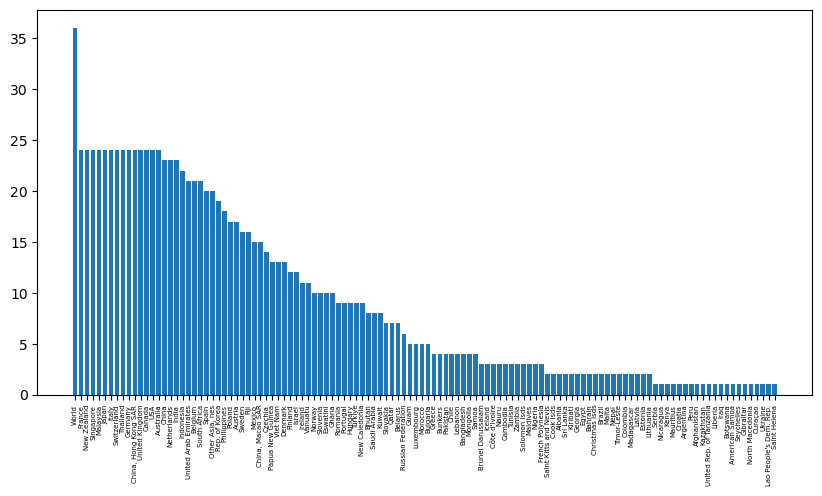

In [238]:
partners_records = df['partnerDesc']
partners = partners_records.unique()

partners_count = partners_records.value_counts()

plt.figure(figsize=(10, 5))
plt.bar(partners_count.index, partners_count.values)
plt.xticks(rotation = 90, fontsize =5)
plt.show()

In [250]:
df['date'] = pd.to_datetime(
    df['refYear'].astype(str) + '-' + df['refMonth'].astype(str)
)

df['date']

0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
          ...    
1071   2022-12-01
1072   2022-12-01
1073   2022-12-01
1074   2022-12-01
1075   2022-12-01
Name: date, Length: 1076, dtype: datetime64[ns]

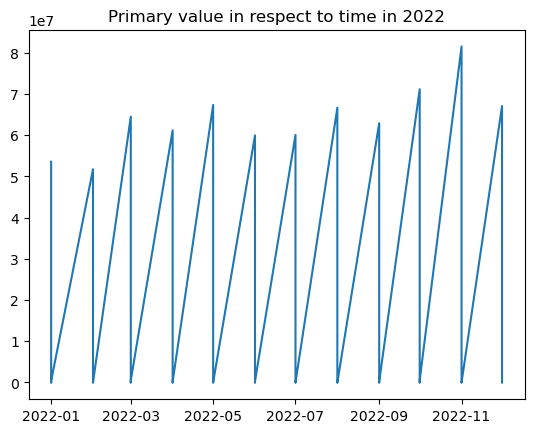

In [ ]:
plt.plot(df['date'], df['primaryValue'])
plt.title('Primary value in respect to time in 2022')
plt.show()

### Issues
1. Quantities are missed and it's the main label that represent demand.
2. the existing records are monthly records for importing values not record for importing transactions.
3. the data shows the importing of a product profile over a year monthly for a country not a city or a smaller region so we need to make a way to make it more specific.
4. this data don't represent if these products are consumed in the local market or rexported.
